# Сравнение эффективности моделей в задачах регрессии

## Данные
Представлены данные о бурении туннеля, которые моделируют соотношение рентгеновского сигнала и плотности скальной породы. С помощью рентгеновского излучения можно определить плотность горной породы. Исходя из этого выбирают соответствующий будровой щит.

<font color='orange'>Задача:</font>

Построить общую модель, которая по входному сигналу будет выдавать оценку плотности скальной породы.

Для решения этой задачи мы сравним разные модели:

* Линейная регрессия
* Полиномиальная регрессия
* KNN
* Деревья решений
* SVM
* Boosted trees
* Случайные леса


## <font color='orange'>Загружаем библиотеки</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## <font color='orange'>Данные</font>

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


Переименуем колонки для дальнейшего удобства работы с ними

In [4]:
df.columns = ['Signal', 'Density']

Визуализируем взаимосвязь данных с целевой переменной

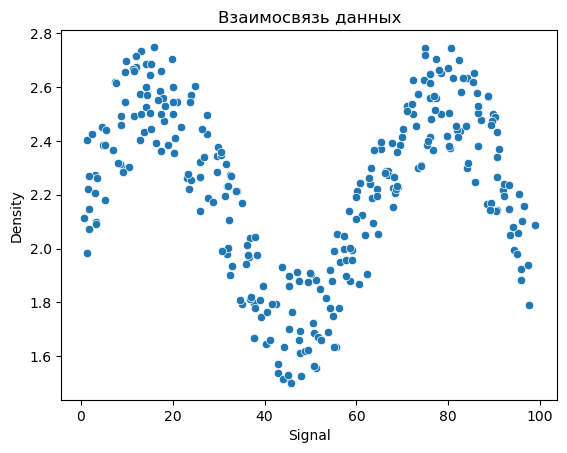

In [5]:
sns.scatterplot(x = 'Signal', 
                y = 'Density', 
                data = df).set_title('Взаимосвязь данных');

Видим, что данные имеют синусоидальное распределение

### <font color = 'green'>Разбиение данных</font>


In [6]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

Так как у нас только один признак, нет необходимости в масштабировании

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [8]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    #обучение модели
    model.fit(X_train, y_train)
    
    #вычислим метрики
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    y_mean = np.mean(df['Density'])
    print(f'MAE = {mae:.2f}')
    print(f'RMSE = {rmse:.2f}')
    print(f'Среднее значение целевой переменной = {y_mean:.2f}')
    
    #построим график
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize = (10, 4))
    sns.scatterplot(x = 'Signal', 
                    y = 'Density', 
                    data = df, 
                    color = 'black').set_title('Сравнение тестовых и предсказанных значений')
    plt.plot(signal_range, signal_preds)

 ### <font color='orange'>Линейная регрессия</font>


MAE = 0.21
RMSE = 0.26
Среднее значение целевой переменной = 2.23


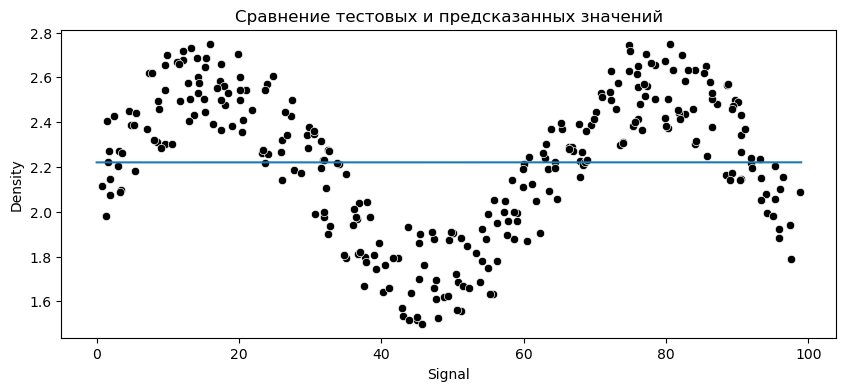

In [9]:
#Создаем модель
model = LinearRegression()

#Применяем функцию
run_model(model, X_train, y_train, X_test, y_test)

Несмотря на то, что метрики показывают нам малые значения ошибок, данный график доказывает, что линейная регрессия не подходит для предсказания данных, имеющих синусоидальное распределение 

 ### <font color='orange'>Полиномиальная регрессия</font>


MAE = 0.23
RMSE = 0.28
Среднее значение целевой переменной = 2.23


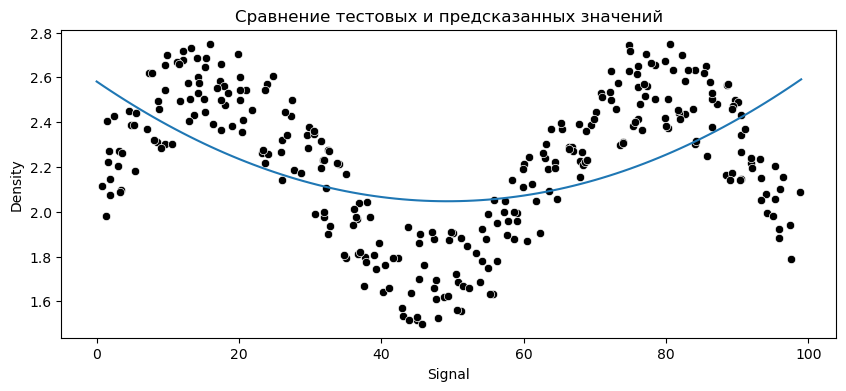

In [10]:
# 1) создание полиноминальных ппризнаков (стеень полинома 2)
# 2) линейная регрессия
pipe = make_pipeline(PolynomialFeatures(degree= 2), LinearRegression())

#Применяем функцию
run_model(pipe, X_train, y_train, X_test, y_test)

График полинома второй степени также плохо подходит для предсказания данных. 

Однако, если мы увеличием степень полинома:

MAE = 0.12
RMSE = 0.14
Среднее значение целевой переменной = 2.23


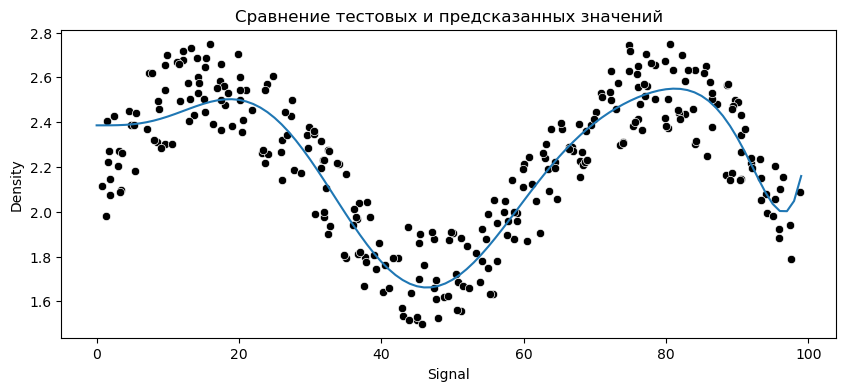

In [11]:
# 1) создание полиноминальных ппризнаков (стеень полинома 10)
# 2) линейная регрессия
pipe = make_pipeline(PolynomialFeatures(degree= 10), LinearRegression())

#Применяем функцию
run_model(pipe, X_train, y_train, X_test, y_test)

При увеличении степени полинома до 10, наблюдается уменьшается ошибки в 2 раза, но происходит переобучение

 ### <font color='orange'>KNN</font>

k =  1
MAE = 0.12
RMSE = 0.15
Среднее значение целевой переменной = 2.23
k =  5
MAE = 0.12
RMSE = 0.14
Среднее значение целевой переменной = 2.23
k =  10
MAE = 0.12
RMSE = 0.13
Среднее значение целевой переменной = 2.23
k =  30
MAE = 0.13
RMSE = 0.16
Среднее значение целевой переменной = 2.23


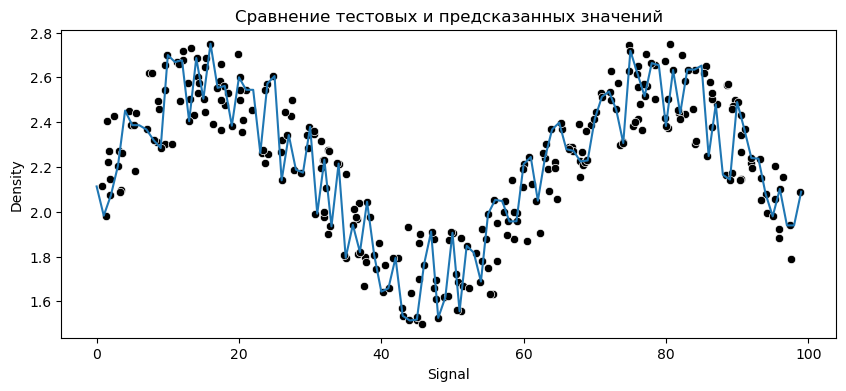

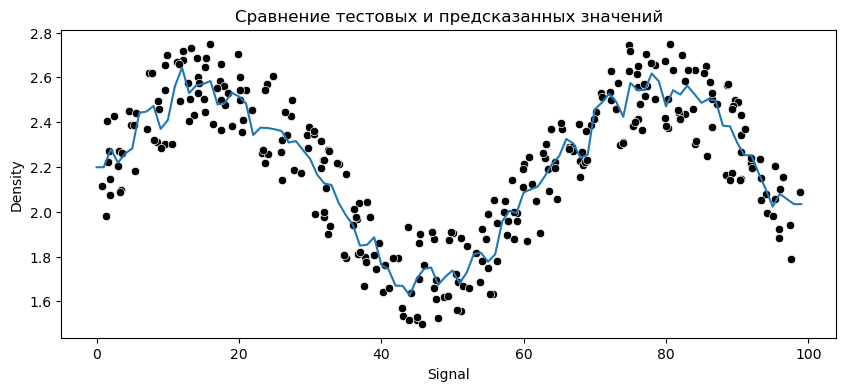

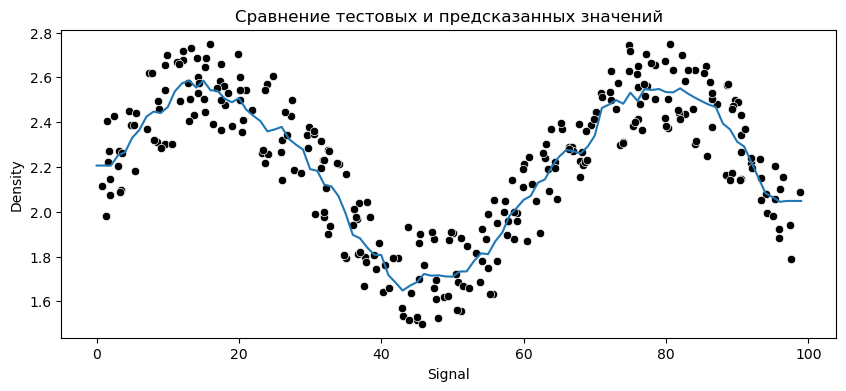

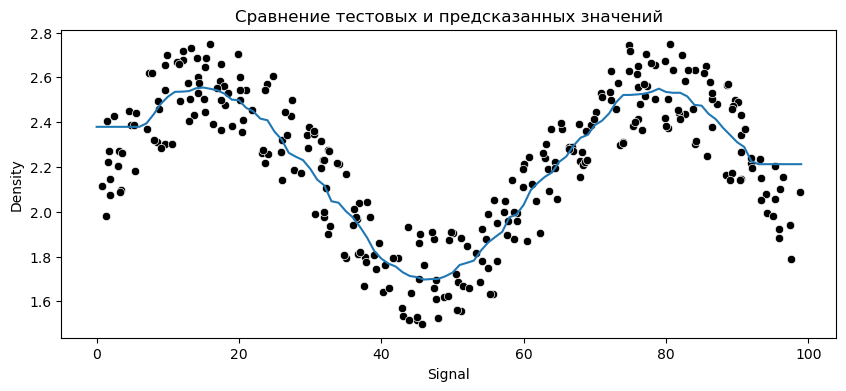

In [12]:
k_value = [1, 5, 10, 30]
for n in k_value:
    print('k = ', n)
    
    #Создаем модель
    model = KNeighborsRegressor(n_neighbors=n)
    
    #Применяем функцию
    run_model(model, X_train, y_train, X_test, y_test)

Чем больше k, тем больше усреднение, т.е. мы добавляем в модель больше смещения. Однако при слишком большом k происходит искажение

 ### <font color='orange'>Деревья решений</font>

MAE = 0.12
RMSE = 0.15
Среднее значение целевой переменной = 2.23


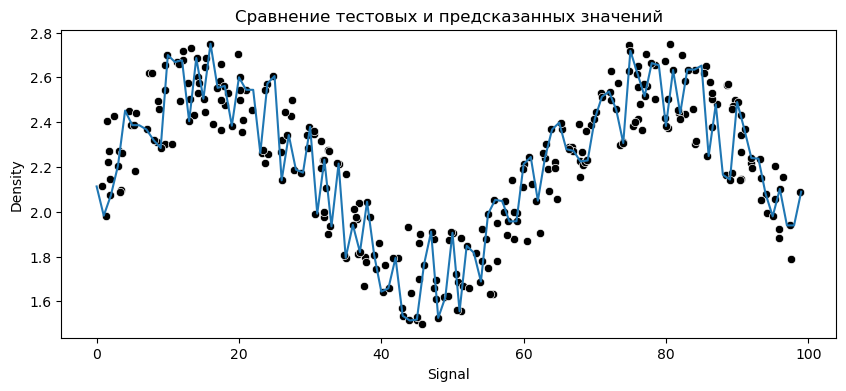

In [13]:
#Создаем модель
model = DecisionTreeRegressor()

#Применяем функцию
run_model(model, X_train, y_train, X_test, y_test)

Получаем переобученную модель

### <font color='orange'>SVM</font>

MAE = 0.11
RMSE = 0.13
Среднее значение целевой переменной = 2.23


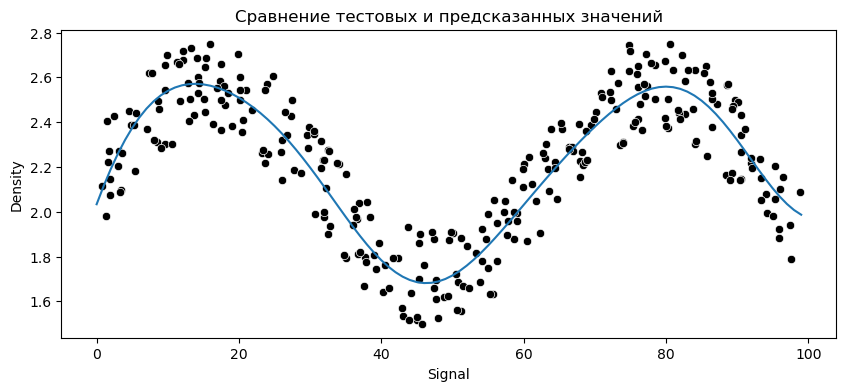

In [14]:
#Создаем модель
svr = SVR()

#Создаем сетку
param_grid = {'C' : [0.01, 0.1, 1, 5, 10, 100],
             'gamma' : ['auto', 'scale']}
grid = GridSearchCV(svr, param_grid)

#Применяем функцию
run_model(grid, X_train, y_train, X_test, y_test)

Получаем хороший плавный график

 ### <font color='orange'>Случайные леса</font>

MAE = 0.12
RMSE = 0.15
Среднее значение целевой переменной = 2.23


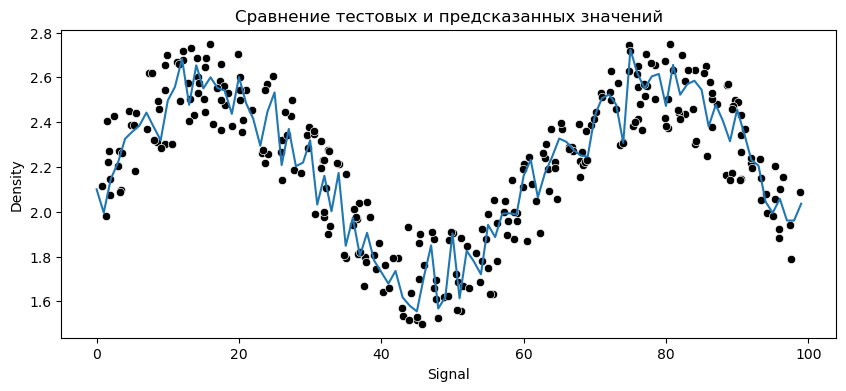

In [15]:
#Создаем модель
rfr = RandomForestRegressor(n_estimators=10)

#Применяем функцию
run_model(rfr, X_train, y_train, X_test, y_test)

Как и деревья решений, модель слишком чувствительна к шумам, что делает её переобученной

 ### <font color='orange'>Boosted tree</font>

MAE = 0.11
RMSE = 0.13
Среднее значение целевой переменной = 2.23


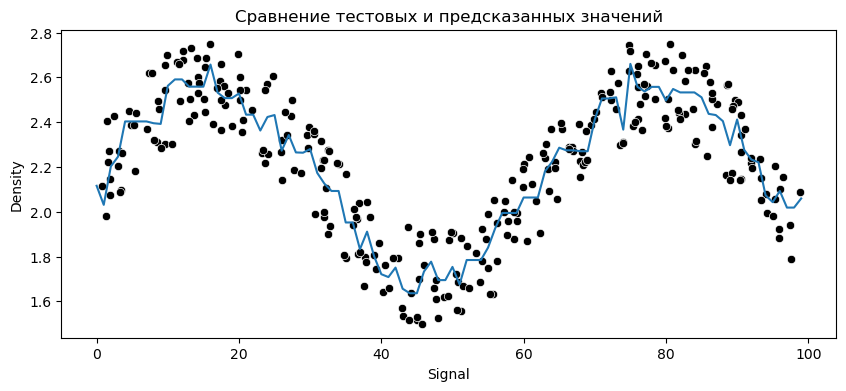

In [16]:
#Создаем модель
model = GradientBoostingRegressor()

#Применяем функцию
run_model(model, X_train, y_train, X_test, y_test)

MAE = 0.12
RMSE = 0.14
Среднее значение целевой переменной = 2.23


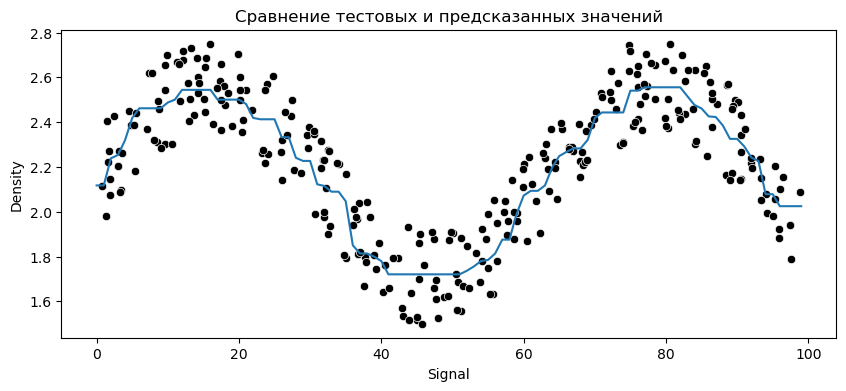

In [17]:
#Создаем модель
model = AdaBoostRegressor()

#Применяем функцию
run_model(model, X_train, y_train, X_test, y_test)

Как и деревья решений и случайные леса, для градиентного бустинга наблюдается чувствительность к шумам, но он более плавный, а также достаточно хорошо проходит вдоль тренда в наших точках. Т.о. в данной задаче градиентный бустинг подходит лучше, чем деревья и леса.